# Basics

In this workbook we'll try to walk through some basics of the linear regression models shown in the tutorial.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"
})

In [6]:
workbook_data = pickle.load(open('data/workbook_0.p', 'rb'))
x, y, ye = workbook_data['x'], workbook_data['y'], workbook_data['ye']

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), Text(0.5, 1.0, 'Fake Data')]

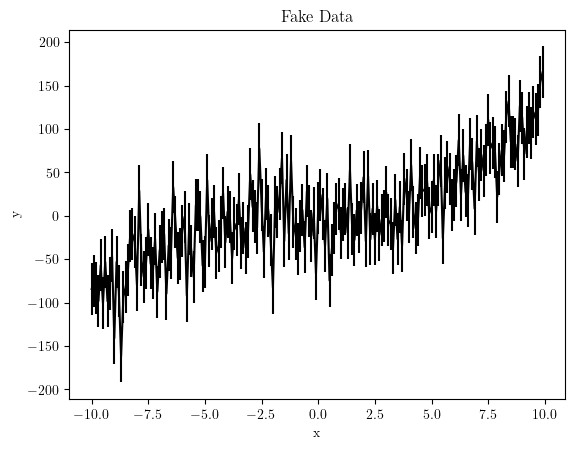

In [7]:
fig, ax = plt.subplots()
ax.errorbar(x, y, ye, color='k')
ax.set(xlabel='x', ylabel='y', title='Fake Data')

## Step 1: Create a design matrix

Create a design matrix for the data above. The design matrix should be a **3rd order polynomial**. The order of the vectors in the design matrix should be $x^0$, $x^1$, ... , $x^n$.

Overwrite `A` below to be your design matrix.

In [8]:
porder = 4
A = np.vstack([
    x ** order for order in range(porder)
]).T

In [15]:
assert isinstance(A, np.ndarray)
assert np.all([np.allclose(a, x**idx) for idx, a in enumerate(A.T)])

## Step 2: Find the best fitting weights
Use the Weighted Least Squares equation to find the mean best fitting weights. 

Overwrite `w` below to be your mean best fitting weights. 

In [16]:
w = w = np.linalg.solve(A.T.dot(A), A.T.dot(y))

In [17]:
assert np.isclose(w, workbook_data['true_w'], atol=3*np.linalg.inv(A.T.dot(A/ye[:, None]**2)).diagonal()**0.5).all()

## Step 3: Find the errors on the best fitting weights

Calculate the errors on the best fitting weights (i.e. the standard deviation of the distribution of the best fitting weights.)

Overwrite `w_err` below with your best fitting weights 

In [8]:
w_err = None

In [9]:
assert len(w_err) == len(w)
assert np.allclose(w_err, np.asarray([3.18224571, 0.91858162, 0.07118683, 0.01403367]), atol=0.3)

## Step 4: Calculate the model outside of the data bounds

Use your best fitting weights to calculate the mean model at position $x = 11$.

Overwrite `y_11` below with your answer. 

In [31]:
x_11 = 11
Anew = np.vstack([
    (x - x_11) ** order for order in range(porder)
]).T
Anew

array([[ 1.000000e+00, -2.100000e+01,  4.410000e+02, -9.261000e+03],
       [ 1.000000e+00, -2.090000e+01,  4.368100e+02, -9.129329e+03],
       [ 1.000000e+00, -2.080000e+01,  4.326400e+02, -8.998912e+03],
       [ 1.000000e+00, -2.070000e+01,  4.284900e+02, -8.869743e+03],
       [ 1.000000e+00, -2.060000e+01,  4.243600e+02, -8.741816e+03],
       [ 1.000000e+00, -2.050000e+01,  4.202500e+02, -8.615125e+03],
       [ 1.000000e+00, -2.040000e+01,  4.161600e+02, -8.489664e+03],
       [ 1.000000e+00, -2.030000e+01,  4.120900e+02, -8.365427e+03],
       [ 1.000000e+00, -2.020000e+01,  4.080400e+02, -8.242408e+03],
       [ 1.000000e+00, -2.010000e+01,  4.040100e+02, -8.120601e+03],
       [ 1.000000e+00, -2.000000e+01,  4.000000e+02, -8.000000e+03],
       [ 1.000000e+00, -1.990000e+01,  3.960100e+02, -7.880599e+03],
       [ 1.000000e+00, -1.980000e+01,  3.920400e+02, -7.762392e+03],
       [ 1.000000e+00, -1.970000e+01,  3.880900e+02, -7.645373e+03],
       [ 1.000000e+00, -1.960000e+

In [33]:
y_11

array([27063407.17393597])

In [25]:
assert y_11 == 181.83203225825352

AssertionError: 

## Step 5: Estimate the error on the model at new point

Use `np.random.multivariate_normal` to estimate the model error at  $x = 11$.

Overwrite `y_11_err` below with your answer.

In [12]:
y_11_err = None

In [13]:
assert np.isclose(y_11_err, 12, atol=2)